In [16]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from random import sample
from PIL import Image
import json
import csv


os.getcwd()

'/usr/users/vogg/FairMOT/own_ideas'

## Crowdhuman Bounding Boxes

In [5]:
path1 = "/local_datasets/crowdhuman/labels_with_ids/train/"
path2 = "/local_datasets/crowdhuman/images/train/"

### One example

### Function

In [7]:
def plotBBox(img_id, img_path, label_path):
    coords = pd.read_csv(label_path + img_id + ".txt", header = None, 
                       sep = " ")
    im = cv2.imread(img_path + img_id + ".jpg")
    
    im_h, im_w = im.shape[:2]

    for i in range(len(coords)):
        center = tuple(map(int, (im_w * coords.iloc[i, 2], im_h * coords.iloc[i, 3])))
        low_left = tuple(map(int, (im_w * (coords.iloc[i, 2] - coords.iloc[i, 4]/2),
                                   im_h * (coords.iloc[i, 3] - coords.iloc[i, 5]/2))))
        up_right = tuple(map(int, (im_w * (coords.iloc[i, 2] + coords.iloc[i, 4]/2), 
                                 im_h * (coords.iloc[i, 3] + coords.iloc[i, 5]/2))))

        color = (i * 100 % 255, i * 75 % 255, i * 50 % 255)
        im = cv2.circle(im, center, radius = 2, color = color, thickness = 5)
        im = cv2.rectangle(im, low_left, up_right, color = color, thickness = 5)
        
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

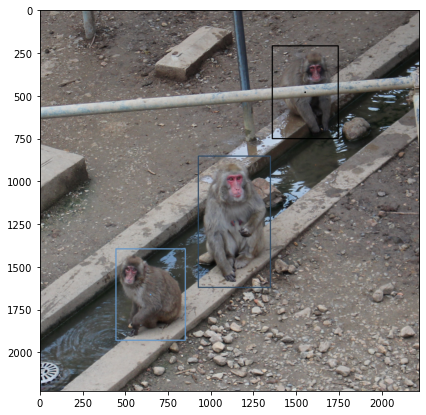

In [8]:
plotBBox('PRI_1384', '/local_datasets/MacaquePose/images/', 
         '/local_datasets/MacaquePose/labels_with_ids/')

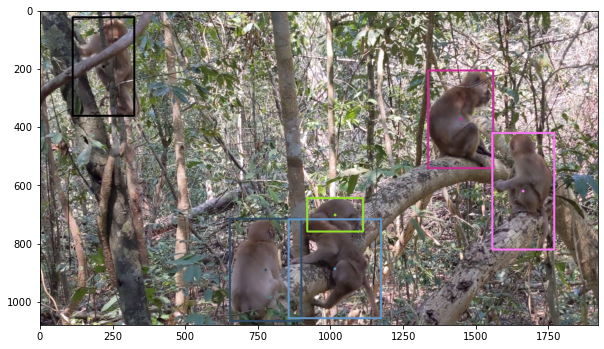

In [9]:
plotBBox('VID_20210223_123551.mp4#t=0.6', '/usr/users/vogg/test/images/',
        '/usr/users/vogg/test/labels_with_ids/')

## Show trajectories

In [33]:
img_path = "/usr/users/vogg/test/labels_with_ids/"
labels = pd.read_csv(img_path + "../Validation-export.csv")
img_list = labels['image'].unique()

In [65]:
img_id0 = img_list[0]
im = cv2.imread(img_path + "../images/" +img_id0)
im_h, im_w = im.shape[:2]


print(im.shape)

(1080, 1920, 3)


In [77]:
for img_id in img_list:
    img_id = re.sub("[.]jpg","", img_id)
    coords = pd.read_csv(img_path + img_id + ".txt", header = None, 
                           sep = " ")
    
    for index, row in coords.iterrows():
        center = tuple(map(int, (im_w * row[2], im_h * row[3])))
        low_left = tuple(map(int, (im_w * (row[2] - row[4]/2),
                                   im_h * (row[3] - row[5]/2))))
        up_right = tuple(map(int, (im_w * (row[2] + row[4]/2), 
                                 im_h * (row[3] + row[5]/2))))

        color = (row[1] * 170 % 255, row[1] * 100 % 255, row[1] * 70 % 255)
        im = cv2.circle(im, center, radius = 3, color = color, thickness = 5)

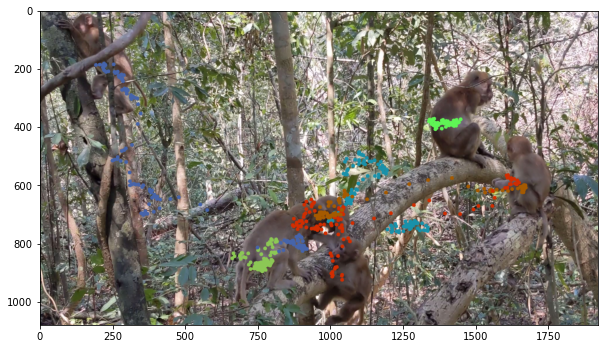

In [78]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))